In [261]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-05-30 18:57:31.232460


In [262]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)


Num GPUs Available:  1
2.10.0


In [263]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"{dirpath} contains {len(dirnames)} files and {len(filenames)} images \n")

pizza_steak contains 2 files and 0 images 

pizza_steak\test contains 2 files and 0 images 

pizza_steak\test\pizza contains 0 files and 250 images 

pizza_steak\test\steak contains 0 files and 250 images 

pizza_steak\train contains 2 files and 0 images 

pizza_steak\train\pizza contains 0 files and 750 images 

pizza_steak\train\steak contains 0 files and 750 images 


In [264]:
import pathlib
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


### Data directories

In [265]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'


# Create data iterators 

In [266]:
BATCH_SIZE = 32
IMG_SIZE = 224
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE,IMG_SIZE),
    shuffle=False,
    seed=42
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE,IMG_SIZE),
    shuffle=False,
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [267]:
for images, labels in train_ds.take(1):
  # Get first batch of images (batch_size = 32)
  images = images.numpy()
  break


In [268]:
image = images[0] 

# Preprocessing functions

In [269]:
from keras import layers
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])

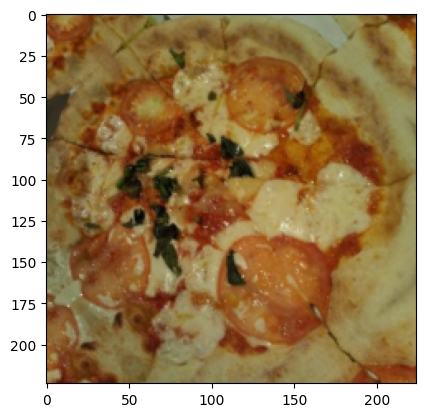

In [270]:
image1 = resize_and_rescale(image)
image2 = data_augmentation(image1)
plt.imshow(image2)

In [271]:
model = tf.keras.Sequential([
    resize_and_rescale,
  tf.keras.layers.Conv2D(filters=16,kernel_size=(3),activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3),activation='relu'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [272]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [273]:
epochs=5
history = model.fit(train_ds, # now the augmented data is shuffled
                            epochs=3,
                            steps_per_epoch=len(train_ds),
                            validation_data=test_ds,
                            validation_steps=len(test_ds))

Epoch 1/3
47/47 [==============================] - 4s 76ms/step - loss: 10.1420 - accuracy: 0.8600 - val_loss: 6.1222 - val_accuracy: 0.5000
Epoch 2/3
47/47 [==============================] - 3s 72ms/step - loss: 1.6700 - accuracy: 0.2840 - val_loss: 0.7184 - val_accuracy: 0.5000
Epoch 3/3
47/47 [==============================] - 4s 75ms/step - loss: 0.7450 - accuracy: 0.3313 - val_loss: 0.6940 - val_accuracy: 0.5000


<Axes: >

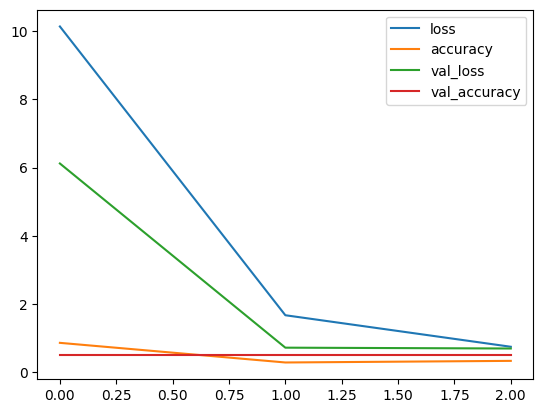

In [274]:
pd.DataFrame(history.history).plot()